# Online Food Order Prediction
- The food order prediction system is one of the useful techniques companies can use to make the entire delivery process fast.

- Let’s start with the task of online food order prediction with machine learning.

In [24]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


- So the dataset contains information like:

1. the age of the customer
2. marital status of the customer
3. occupation of the customer
4. monthly income of the customer
5. educational qualification of the customer
6. family size of the customer
7. latitude and longitude of the location of the customer
8. pin code of the residence of the customer
9. did the customer order again (Output)
10. Feedback of the last order (Positive or Negative)

- Let's have a look at the information about all columns in the dataset

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


- As you can see from the above inforamtioin none of the columns in our dataset contain missing values

## Data Analysis
- Now let’s move to the analysis of this data. We will start by looking at the online food order decisions based on the age of the customer

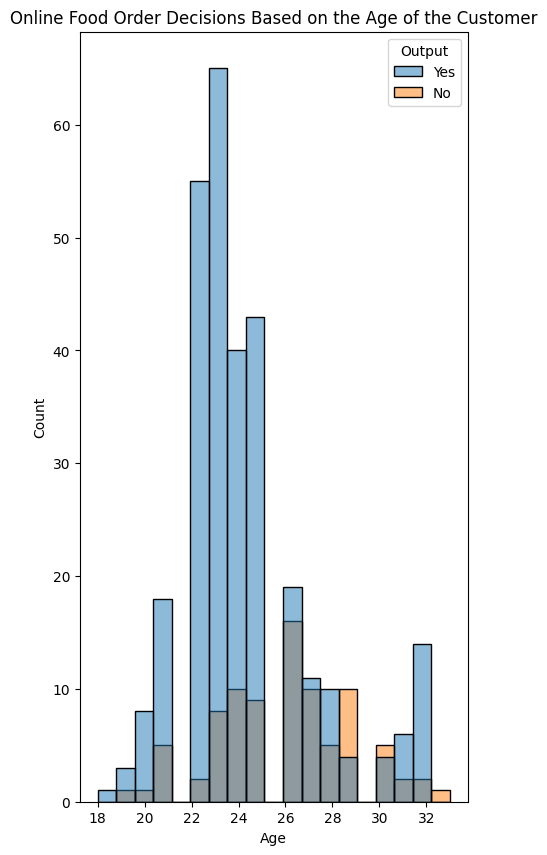

In [27]:
plt.figure(figsize=(5, 10))
plt.title('Online Food Order Decisions Based on the Age of the Customer')
sns.histplot(x='Age', hue='Output', data=data)
plt.show()

- We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies. Now let’s have a look at the online food order decisions based on the size of the family of the customer

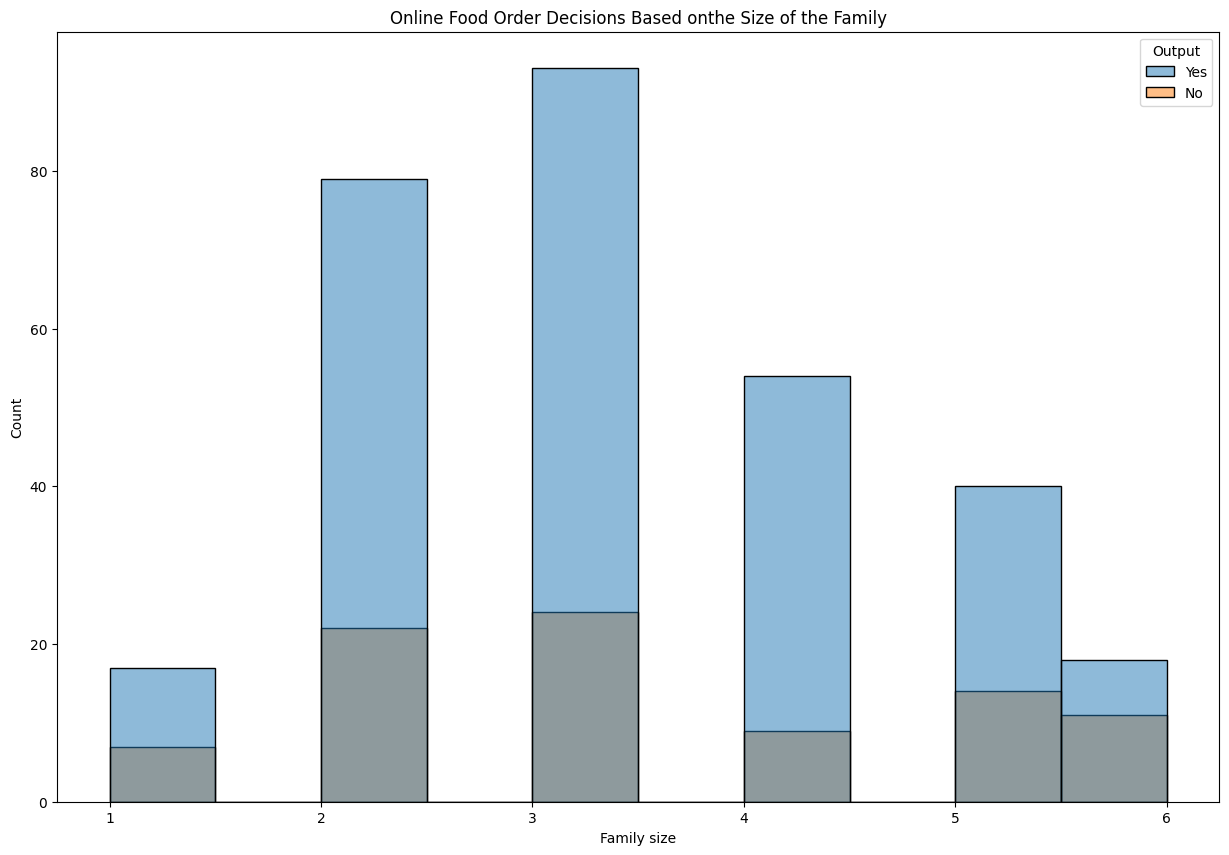

In [28]:
plt.figure(figsize=(15, 10))
plt.title('Online Food Order Decisions Based onthe Size of the Family')
sns.histplot(x='Family size', hue='Output', data=data)
plt.show()

- As we can see from the above figure families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

- Let’s create a dataset of all the customers who ordered the food again

In [31]:
ordering_again_data = data.query("Output == 'Yes'")
ordering_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


- Now let’s have a look at the gender column. Let’s find who orders food more online

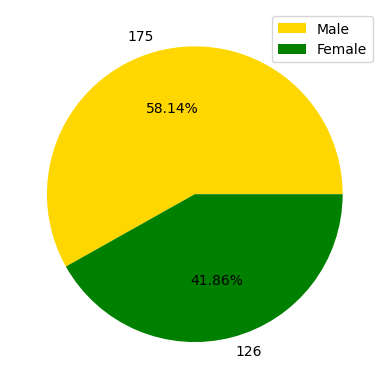

In [55]:
gender = ordering_again_data['Gender'].value_counts()
label = gender.index
counts = gender.values
colors = ['gold', 'green']

plt.pie(counts, labels=counts, colors=colors, autopct='%1.2f%%')
plt.legend(label)
plt.show()

- According to the dataset, male customers are ordering more compared the females. Now let’s have a look at the marital status of the customers who ordered again

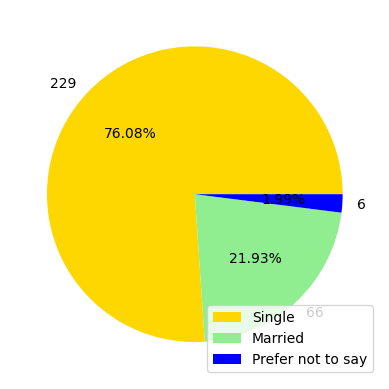

In [56]:
marital = ordering_again_data['Marital Status'].value_counts()
label = marital.index
counts = marital.values
colors = ['gold', 'lightgreen', 'blue']

plt.pie(counts, labels=counts, colors=colors, autopct='%1.2f%%')
plt.legend(label)
plt.show()

- According to the above figure, 76.1% of the frequent customers are singles. Now let’s have a look at what’s the income group of the customers who ordered the food again

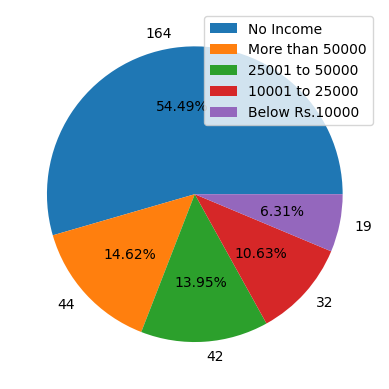

In [58]:
income = ordering_again_data['Monthly Income'].value_counts()
label = income.index
counts = income.values

plt.pie(counts, labels=counts, autopct='%1.2f%%')
plt.legend(label)
plt.show()

- According to the above figure, 54.5% of the customers don’t fall under any income group. They can be housewives or students.

## Data Preprocessing
- Now let’s prepare the data for the task of training a machine learning model. First we will convert all the categorical features into numerical values

In [59]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Marital Status'] = data['Marital Status'].map({'Married': 2, 'Single': 1, 'Prefer not to say': 0})
data["Occupation"] = data["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Employeed": 3,
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


## Online Food Order Prediction Model
- Now let’s train a machine learning model to predict whether a customer will order again or not. We will start by splitting the data into training and test sets

In [66]:
from sklearn.model_selection import train_test_split

# splitting the data
X = np.array(data[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data['Output'])

- Now, let's train the learning model

In [67]:
from sklearn.ensemble import RandomForestClassifier

# training a machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8974358974358975

- Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not

In [65]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("1. Enter the Age of the Customer: "))
b = int(input("2. Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("3. Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("4. Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("5. Monthly Income (No Income: 0, 25001 to 50000: 5000, More than 50000: 7000, 10001 to 25000: 25000, Below Rs.10000: 10000)"))
f = int(input("6. Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("7. Family Size: "))
h = int(input("8. Pin Code: "))
i = int(input("9. Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print('Will customer order again or not: ', model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
1. Enter the Age of the Customer: 22
2. Enter the Gender of the Customer (1 = Male, 0 = Female): 1
3. Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
4. Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
5. Monthly Income (No Income: 0, 25001 to 50000: 5000, More than 50000: 7000, 10001 to 25000: 25000, Below Rs.10000: 10000)0
6. Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
7. Family Size: 3
8. Pin Code: 560010
9. Review of the Last Order (1 = Positive, 0 = Negative): 1
Will customer order again or not:  ['Yes']
